In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from os import getcwd
print(getcwd())

C:\Users\YJ\Bigdata\211215


# <Quiz 1> 데이터 프레임을 csv 로 저장하기

In [5]:
file_path = '../Data/drinks.csv'
drinks = pd.read_csv(file_path) # read_csv() 함수로 데이터를 데이터 프레임 형태로 불러옵니다.

In [6]:
drinks.to_csv('Drinks_BigData.csv') # to_csv() 함수로 데이터 프레임을 저장 한다.

# <Quiz 2> 한글을 그래프에서 출력하기

한글을 사용하기 위한 한글 폰트 지정

In [7]:
from matplotlib import font_manager, rc # font_manager을 import
font_path = "C:/Windows/Fonts/H2HDRM.TTF" # font의 지정 경로
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

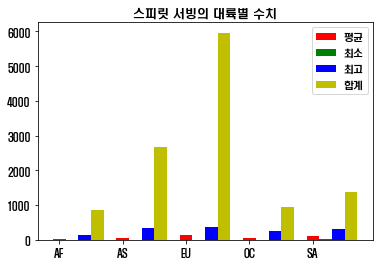

In [8]:
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])

n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist() 
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups) # n_groups의 크기 6만큼 배열 생성하여 index에 저장
bar_width = 0.2

# 평균 값에 대한 그래프 생성
rects1 = plt.bar(index, means, bar_width, color='r',label='평균')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g',label='최소')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b',label='최고')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color='y',label='합계')

plt.title(' 스피릿 서빙의 대륙별 수치 ')
          
plt.xticks(index, result.index.tolist())
plt.legend() # 그래프에 범례를 달고 싶을 때 쓰는 함수
plt.show()

In [9]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


대륙별 total_litres_of_pure_alcohol을 시각화

In [10]:
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()

In [11]:
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [12]:
continent_mean.index

Index(['AF', 'AS', 'EU', 'OC', 'SA'], dtype='object', name='continent')

In [13]:
len(continent_mean)

5

In [14]:
continent_mean.values

array([3.00754717, 2.17045455, 8.61777778, 3.38125   , 6.30833333])

In [15]:
continents = continent_mean.index.tolist()

In [16]:
continents.append('mean')

In [17]:
continents

['AF', 'AS', 'EU', 'OC', 'SA', 'mean']

In [18]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
total_mean

4.717098445595855

In [19]:
#continent_mean.tolist()
alcohol = continent_mean.values.tolist()

In [20]:
# 대륙별 알코올 평균 리스트 마지막에 전체 평균 추가
alcohol.append(total_mean)
alcohol

[3.0075471698113208,
 2.1704545454545454,
 8.617777777777778,
 3.38125,
 6.308333333333334,
 4.717098445595855]

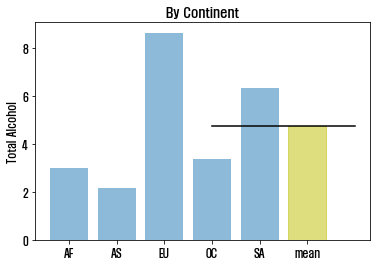

In [26]:
x_pos = np.arange(len(continents))
bar_list = plt.bar(x_pos, alcohol, align = 'center' , alpha=0.5)
bar_list[5].set_color('y')

plt.ylabel('Total Alcohol')
plt.title('By Continent')
plt.plot([3., 6], [total_mean, total_mean], "k-")
plt.xticks(x_pos, continents)

plt.show()

In [27]:
continents_std = drinks.groupby('continent').total_litres_of_pure_alcohol.std()

In [34]:
continents_std

continent
AF    2.647557
AS    2.770239
EU    3.358455
OC    3.345688
SA    1.531166
Name: total_litres_of_pure_alcohol, dtype: float64

In [35]:
total_std = drinks.total_litres_of_pure_alcohol.std()
total_std

3.773298164356083

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [37]:
continents_std

continent
AF    2.647557
AS    2.770239
EU    3.358455
OC    3.345688
SA    1.531166
Name: total_litres_of_pure_alcohol, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

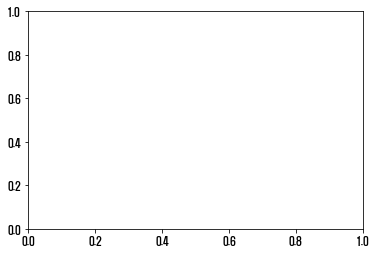

In [38]:
x_pos = np.arange(len(continents_std))

#alcohol = continents_std.values.tolist()
#alcohol.append(total_std)

bar_list = plt.bar(x_pos, alcohol, align = 'center' , alpha=0.5)
bar_list[5].set_color('y')

plt.ylabel('Total Alcohol Of 표준편차')
plt.title('By Continent')
plt.plot([0., 6], [total_std, total_std], "k-")
plt.xticks(x_pos, continents_std)

plt.show()